### 1. Import

In [1]:
from ultralytics import YOLO
import numpy as np
from pathlib import Path
import  cv2
import os
import models.models as mdl
from lib.resistorpreprocessing import detect_rotate
from lib.helpfunctions import get_image_and_class, get_class_names_from_folder, get_predicted_class
import random
import matplotlib.pyplot as plt
import time

c:\Users\phili\Desktop\Desktop\Studium\Master EI\Semester 3\AAML\Paper Resistor Classification\Code\Github\models\model_dependencies.py:27: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  MobileNetV2_base = tf.keras.applications.MobileNetV2(input_shape=img_shape,
c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 48 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 38 variables. 
  trackable.load_own_variables(weights_store.get(inner_path

c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 50 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


### 2. Take Picture

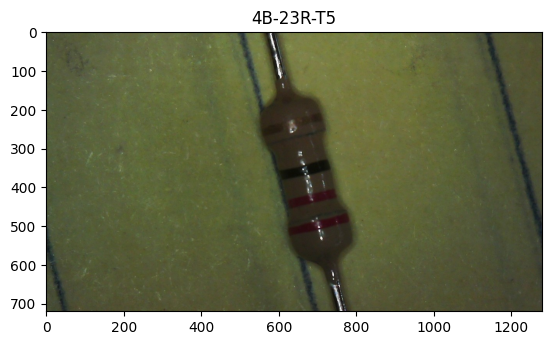

In [2]:
dataset = './Datasets/Original_Dataset'
image_path, class_name = get_image_and_class(dataset)
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.title(class_name)
plt.imshow(image)

### 3. Preprocess Image

Loading models\YoloModel.onnx for ONNX Runtime inference...
Preferring ONNX Runtime AzureExecutionProvider

0: 640x640 1 Resistor, 108.4ms
Speed: 0.0ms preprocess, 108.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Duration Preprocessing 5.25s


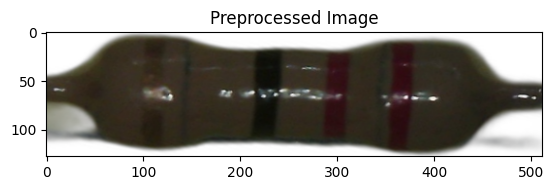

In [3]:
time_start = time.time()
ret,cropped_image = detect_rotate(image)
if(ret==True):
    plt.title('Preprocessed Image')
    plt.imshow(cropped_image)
    cropped_resized = cv2.resize(cropped_image, (256, 256))
    cropped_resized = np.expand_dims(cropped_resized, axis=0)
time_end = time.time()

time_difference = time_end-time_start
print(f'Duration Preprocessing {time_difference:.2f}s')

### 4. Classify Resistor

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted Class: 4B-23R-T5
Comparison with class_name (4B-23R-T5): Correct


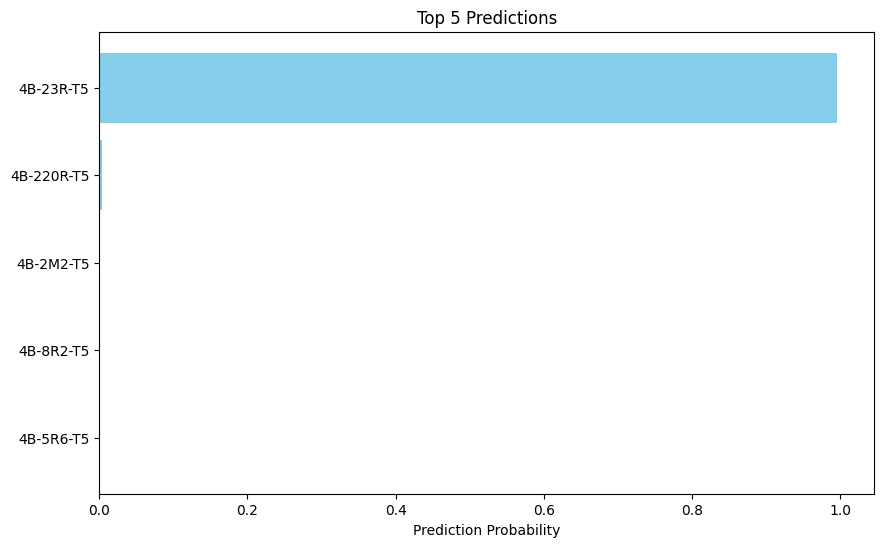

In [4]:
#Choose Model
model = mdl.Ensemble

prediction = model.predict(cropped_resized)
predicted_index = np.argmax(prediction)

classnames = get_class_names_from_folder(dataset)

predicted_class = get_predicted_class(classnames,predicted_index)

comparison_result = "Correct" if predicted_class == class_name else "Incorrect"

# Print the predicted class and comparison result
print(f"Predicted Class: {predicted_class}")
print(f"Comparison with class_name ({class_name}): {comparison_result}")

# Get the top 5 predictions
top_5_indices = np.argsort(prediction[0])[::-1][:5]  # Sort in descending order and take the top 5
top_5_probs = prediction[0][top_5_indices]           # Probabilities of the top 5
top_5_classes = [classnames[i] for i in top_5_indices]  # Class names of the top 5

# Plot the top 5 predictions as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_classes, top_5_probs, color='skyblue')
plt.xlabel('Prediction Probability')
plt.title('Top 5 Predictions')
plt.gca().invert_yaxis()  # Invert Y-axis to have the highest probability at the top
plt.show()